# Vancouver Housing Data 2025 – Part 2: Exploratory Data Analysis (EAD) - Univariate

This notebook presents a **univariate descriptive analysis** of the cleaned and merged dataset prepared in Part 1.  
The aim is to explore patterns and disparities across Metro Vancouver jurisdictions by examining each variable independently:

- The aging profile of owner-occupied housing stock  
- Median **after-tax** household income and its change between 2015 and 2020  

We analyze the distribution of each indicator, highlight rankings among municipalities, and identify regional contrasts.  
These insights provide an initial foundation for understanding spatial and socioeconomic imbalances, guiding future urban planning and policy design.

---

## 1. Project Summary and Part 1 Recap

This project explores regional disparities in housing conditions across Metro Vancouver, focusing on two main dimensions:  
- 🏚️ The aging profile of owner-occupied dwellings  
- 💰 Median after-tax household income and its change between 2015 and 2020  

In **Part 1**, we imported, cleaned, and merged two key datasets from the Metro Vancouver Housing Data Book 2025:
- Table 3.1.2 – Owner-occupied dwellings by construction period  
- Table 1.5.1 – Median household income by jurisdiction

In this notebook, we begin the exploratory data analysis phase.  
We will now generate core indicators, such as the **share of housing older than 40 years**, and explore income distributions and disparities between municipalities. 

---

### Part 2   Objectives

- Load the cleaned and merged dataset prepared in Part 1  
- Perform **univariate descriptive analysis** of housing and income indicators  
- Explore the distribution of aging housing stock across Metro Vancouver jurisdictions  
- Analyze regional variation in median after-tax household income (2020)  
- Examine changes in income levels between 2015 and 2020  
- Highlight patterns and disparities to support future **multivariate analysis** in Part 3

---

### Data Sources

- Dataset: `merged_housing_income_data.pkl`  
- Variables of interest:
  - `percent_40plus` – % of dwellings built before 1981  
  - `growth_index` (if available) – recent construction ratio  
  - `income_2020_total`, `income_2015_total`  
  - `change_total_2015_2020`

Data Source:
The datasets used in this project were retrieved from:
[Metro Vancouver Housing Data Book 2025](https://metrovancouver.org/services/regional-planning/housing-data-book),  
available through the Metro Vancouver Regional Planning Division.

---

### Final Output

This univariate analysis provides a foundational understanding of housing age and income patterns across Metro Vancouver.  
It highlights key disparities and regional contrasts that will guide the next phase of the project: the cross analysis between the age housing and income.

---

## 2. Load Clean Dataset

In this section, we load the cleaned and merged dataset prepared in Part 1.  
This file contains combined housing and income data by jurisdiction and will serve as the basis for our exploratory analysis.

In [20]:
# Load the merged dataset from Pickle format
import pandas as pd

df = pd.read_pickle("merged_housing_income_data.pkl")

# Keep only after-tax income variables by dropping the total income columns
df = df.drop(columns=["income_2015_total", "income_2020_total", "change_total_2015_2020"])

# Quick check: dimensions and column names
print(f"✅ Dataset loaded successfully: {df.shape[0]} rows × {df.shape[1]} columns")
df.columns

✅ Dataset loaded successfully: 23 rows × 13 columns


Index(['jurisdiction', 'total_owner_occupied', 'built_2016_2021',
       'built_2011_2015', 'built_2001_2010', 'built_1991_2000',
       'built_1981_1990', 'built_1971_1980', 'built_1961_1970',
       'built_pre_1961', 'income_2015_after_tax', 'income_2020_after_tax',
       'change_after_tax_2015_2020'],
      dtype='object')

---

## 3. Descriptive Statistics

This section summarizes the main housing and income indicators across Metro Vancouver jurisdictions.  
We begin by reviewing construction patterns by decade, including the proportion of homes built before 1981 (40+ years old), and then explore income levels and growth from 2015 to 2020.

Key indicators explored:
- 🏚️ `percent_40plus`: share of homes built before 1981
- 🏗️ Construction distribution by period (e.g., `built_pre_1961`, `built_1971_1980`, ...)
- 💰 `income_2020_after_tax`: current after-tax household income
- 📈 `change_after_tax_2015_2020`: after-tax income growth (5-year trend)

---

### 3.1 Dataset Structure and Summary Statistics

Before diving into specific indicators, we begin with a general overview of the dataset structure.  
This includes data types, non-null counts, and basic summary statistics to ensure the dataset is ready for analysis.

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   jurisdiction                23 non-null     object 
 1   total_owner_occupied        23 non-null     int64  
 2   built_2016_2021             23 non-null     int64  
 3   built_2011_2015             23 non-null     int64  
 4   built_2001_2010             23 non-null     int64  
 5   built_1991_2000             23 non-null     int64  
 6   built_1981_1990             23 non-null     int64  
 7   built_1971_1980             23 non-null     int64  
 8   built_1961_1970             23 non-null     int64  
 9   built_pre_1961              23 non-null     int64  
 10  income_2015_after_tax       23 non-null     int64  
 11  income_2020_after_tax       23 non-null     int64  
 12  change_after_tax_2015_2020  23 non-null     float64
dtypes: float64(1), int64(11), object(1)
m

,total_owner_occupied,built_2016_2021,built_2011_2015,built_2001_2010,built_1991_2000,built_1981_1990,built_1971_1980,built_1961_1970,built_pre_1961,income_2015_after_tax,income_2020_after_tax,change_after_tax_2015_2020
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,28090.652174,2716.739130,2403.695652,4712.826087,5452.826087,4403.043478,3761.739130,1770.217391,2866.521739,78282.608696,89456.521739,0.149088
std,37737.919901,3782.995929,3511.354380,7349.636173,7727.235014,5956.300282,4230.147646,1914.656080,5828.712324,19415.964663,20710.072782,0.051336
min,230.000000,10.000000,0.000000,25.000000,30.000000,45.000000,20.000000,0.000000,0.000000,45600.000000,58000.000000,0.061728
25%,4580.000000,400.000000,425.000000,867.500000,1010.000000,652.500000,622.500000,115.000000,172.500000,62000.000000,73000.000000,0.109352
50%,14540.000000,965.000000,1085.000000,1870.000000,2275.000000,1990.000000,2100.000000,1025.000000,1135.000000,80000.000000,89000.000000,0.144578
75%,33607.500000,3500.000000,3122.500000,4387.500000,6590.000000,5560.000000,5465.000000,3225.000000,2500.000000,84500.000000,95000.000000,0.188054
max,138850.000000,13705.000000,13415.000000,29470.000000,27475.000000,23670.000000,14350.000000,6345.000000,28025.000000,123000.000000,138000.000000,0.271930


---

#### Initial Insights – Housing & Income

- Construction Trends: Housing peaked in the 1990s–2000s and declined steadily after 2010, with older units (pre-1980) still forming a large share in many areas.

- Income Distribution: After-tax household income in 2020 averages ~$89K, but ranges widely across regions (from $58K to $138K).

---

### 3.2 Thematic Exploration of Key Variables

This section examines the dataset in focused blocks—starting with housing construction periods, followed by income dynamics. By organizing variables thematically, we aim to surface meaningful patterns and disparities across jurisdictions, supporting clearer storytelling in the analysis ahead.

Thematic blocks:

🏗️ Housing Construction Overview

📊 Income Evolution (after-tax household income in 2015 and 2020)

📈 Growth Rate of Income (relative change from 2015 to 2020)

🧓 Aging Housing Stock (% of homes built 40+ years ago)

---

#### lock 1: Housing Construction Overview

This block provides an overview of how housing construction has evolved across Metro Vancouver jurisdictions over the past decades.  
We examine the number of owner-occupied homes built in each historical period to identify construction peaks, stagnation, and long-term development patterns.  

This helps set the context for analyzing the aging of the housing stock and shifts in urban growth.

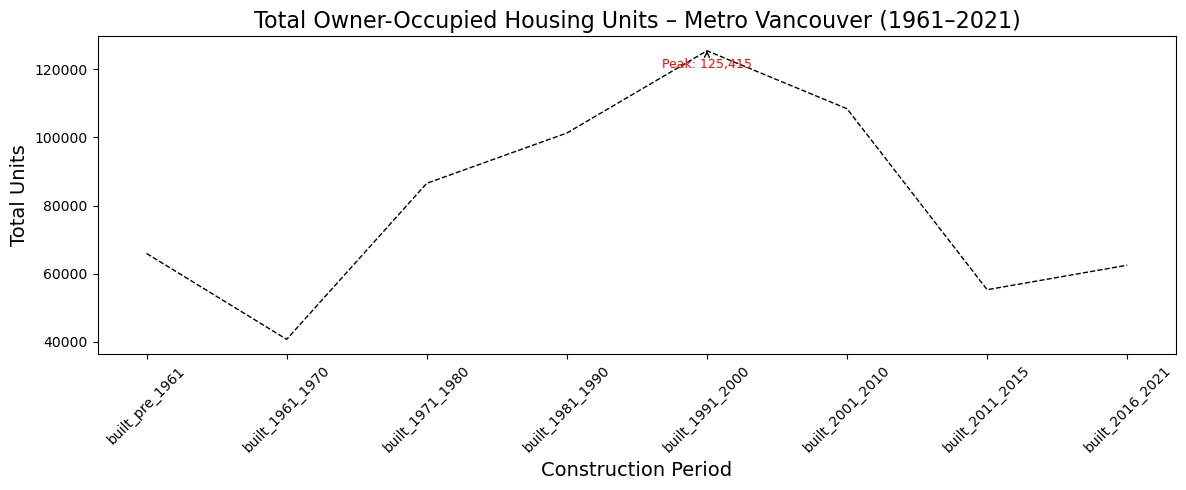

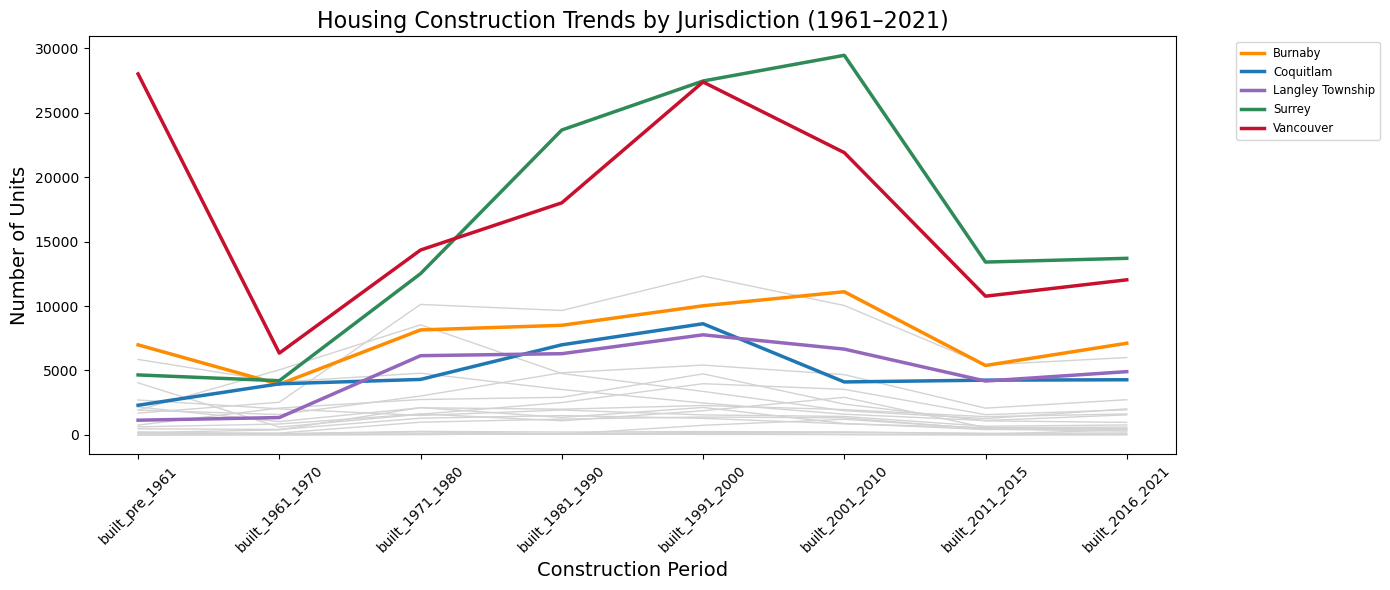

In [52]:
import matplotlib.pyplot as plt

# Step 1: Define construction period columns
ordered_cols = [
    'built_pre_1961', 'built_1961_1970', 'built_1971_1980',
    'built_1981_1990', 'built_1991_2000', 'built_2001_2010',
    'built_2011_2015', 'built_2016_2021'
]

# Step 2: Calculate Metro Vancouver total for each period
metro_vancouver_total = df[ordered_cols].sum()

# Step 3: Plot the line chart with peak annotation
plt.figure(figsize=(12, 5))
plt.plot(ordered_cols, metro_vancouver_total, color="black", linestyle="--", linewidth=1)

# Annotate the peak
peak_index = metro_vancouver_total.idxmax()
peak_value = metro_vancouver_total.max()

plt.annotate(
    f"Peak: {peak_value:,}",
    xy=(peak_index, peak_value),
    xytext=(peak_index, peak_value - 5000),
    ha='center',
    arrowprops=dict(facecolor='red', arrowstyle="->"),
    fontsize=9,
    color='red'
)

# Titles and axes
plt.title("Total Owner-Occupied Housing Units – Metro Vancouver (1961–2021)", fontsize=16)
plt.xlabel("Construction Period", fontsize=14)
plt.ylabel("Total Units", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Salvar em PNG com alta resolução
plt.savefig("metro_vancouver_housing_peak.png", dpi=300)

# Create df_ordered
df_ordered = df[['jurisdiction'] + ordered_cols].set_index('jurisdiction')

# Highlighted cities
highlighted = {
    "Vancouver": "#C8102E",         # Red
    "Surrey": "#2E8B57",            # Green
    "Coquitlam": "#1F77B4",         # Blue
    "Langley Township": "#9467BD",  # Purple
    "Burnaby": "#FF8C00"            # Orange
}

# Step 4: Plot 2 Jurisdictions

fig, ax = plt.subplots(figsize=(14, 6))

for jurisdiction, row in df_ordered.iterrows():
    color = highlighted.get(jurisdiction, "lightgray")
    linewidth = 2.5 if jurisdiction in highlighted else 1
    zorder = 3 if jurisdiction in highlighted else 1
    label = jurisdiction if jurisdiction in highlighted else None
    ax.plot(ordered_cols, row, label=label, color=color, linewidth=linewidth, zorder=zorder)

# Customization
ax.set_title("Housing Construction Trends by Jurisdiction (1961–2021)", fontsize=16)
ax.set_xlabel("Construction Period", fontsize=14)
ax.set_ylabel("Number of Units", fontsize=14)
plt.xticks(rotation=45)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.tight_layout()




---

#### Insights – Housing Construction Overview

- **Most housing was built between 1981 and 2000**
Across **Metro Vancouver**, the majority of owner-occupied homes were constructed between 1981 and 2000. **The period 1991–2000 alone accounts for approximately 125,000 units, making it the peak decade for residential development**. This suggests that a substantial portion of the current housing stock is now over 20 years old, which may have implications for future maintenance, renovations, and energy efficiency upgrades.

- **Construction activity declined after 2010**
**Metro Vancouver experienced a marked decline in housing development after 2010**, especially during the 2011–2015 period. This trend may be attributed to land scarcity, rising construction costs, densification limits, or stricter zoning regulations, especially in mature urban areas.

- **Vancouver and Surrey lead in housing volume**
Vancouver (138,850 units) and Surrey (129,100 units) are the two municipalities with the largest number of owner-occupied dwellings. As major population and employment centers, they have historically absorbed significant development pressure and continue to serve as regional housing anchors.

- **Surrey and Burnaby show strong recent growth**
Surrey stands out for its consistent rise in housing development from the 1980s to the 2000s, peaking in 2001–2010. Burnaby also shows a solid construction profile across recent decades, reinforcing its role as a dynamic urban center within the region.

- Diverse growth trajectories across cities
Jurisdictions such as **Coquitlam** and **Langley Township** have experienced notable suburban expansion, particularly in the last 30 years. Conversely, areas like **West Vancouver** and **Belcarra display** limited recent construction activity, which may signal development saturation, heritage conservation priorities, or restrictive land use policies.

- **Metro-level implications**
When aggregated, the construction trends across Metro Vancouver reveal both a maturing housing stock and uneven growth across jurisdictions. This diversity reinforces the need for regionally coordinated strategies that consider both aging infrastructure and the housing demands of growing communities.

- **Policy considerations**
Municipalities with a high share of housing built before 1980 may require targeted public investment in retrofitting, infrastructure renewal, and sustainability upgrades. Tailoring interventions by local growth profile and housing age can improve livability and equity across the region.
---

#### Block 2: Aging indicator - Share of Homes 40+ Years Old

This block calculates the percentage distribution of owner-occupied homes by construction period for each municipality, with a specific focus on identifying aging housing stock.

An indicator is created to capture the proportion of homes built before 1981, representing those that are 40+ years old as of the 2021 Census.
This helps assess potential structural vulnerabilities and supports strategic planning for renovation, safety, and sustainability efforts across municipalities.

🏚️ Table 2. Share of Owner-Occupied Housing Built Before 1981 (%)


,Jurisdiction,Total Units,Units Built Before 1981,Share Built Before 1981
0,Anmore,665,65,9.8
1,Belcarra,225,95,42.2
2,Bowen Island,"1,470",535,36.4
3,Burnaby,"61,180","19,050",31.1
4,Coquitlam,"38,795","10,555",27.2
5,Delta,"28,780","15,505",53.9
6,Electoral Area A,"3,260",280,8.6
7,Langley City,"7,910","2,670",33.8
8,Langley Township,"38,420","8,620",22.4
9,Lions Bay,435,280,64.4


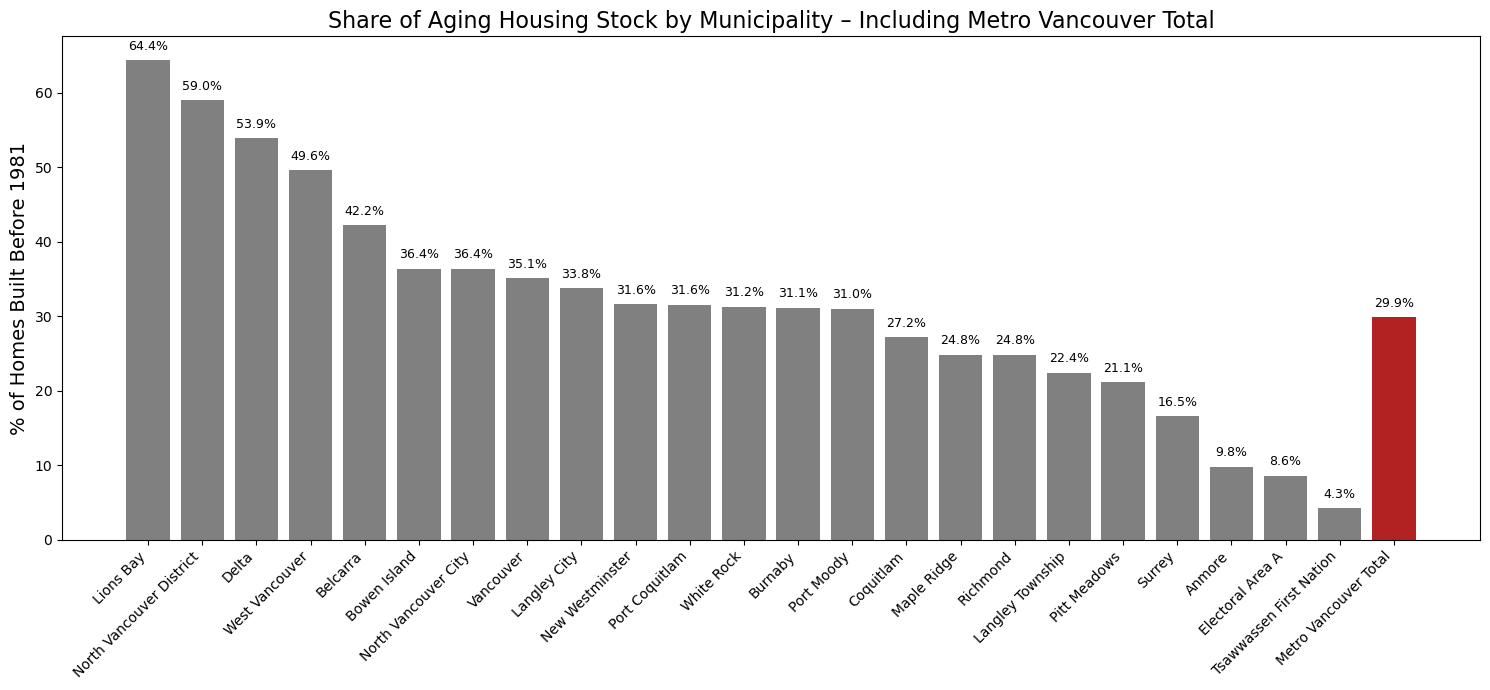

✅ Dataset salvo com o indicador 'percent_40plus' incluído.


In [137]:
import pandas as pd
import matplotlib.pyplot as plt

# ========================================
# Table and Bar Chart: Share of Homes Built Before 1981
# ========================================

# Step 1: Define construction period columns
ordered_cols = [
    'built_pre_1961', 'built_1961_1970', 'built_1971_1980',
    'built_1981_1990', 'built_1991_2000', 'built_2001_2010',
    'built_2011_2015', 'built_2016_2021'
]
pre_1981_cols = ['built_pre_1961', 'built_1961_1970', 'built_1971_1980']

# Step 2: Compute total and pre-1981 units
df['total_units'] = df[ordered_cols].sum(axis=1)
df['pre_1981_units'] = df[pre_1981_cols].sum(axis=1)
df['percent_40plus'] = (df['pre_1981_units'] / df['total_units']) * 100

# Step 3: Prepare summary table (for display)
df_40plus_summary = df[['jurisdiction', 'total_units', 'pre_1981_units', 'percent_40plus']].copy()
df_40plus_summary.columns = ['Jurisdiction', 'Total Units', 'Units Built Before 1981', 'Share Built Before 1981']

# Step 4: Compute Metro Vancouver Total row
total_units_sum = df['total_units'].sum()
pre_1981_sum = df['pre_1981_units'].sum()
percent_40plus_total = (pre_1981_sum / total_units_sum) * 100

metro_row_40plus = pd.DataFrame([{
    'Jurisdiction': 'Metro Vancouver Total',
    'Total Units': total_units_sum,
    'Units Built Before 1981': pre_1981_sum,
    'Share Built Before 1981': percent_40plus_total
}])

# Step 5: Append Metro Vancouver row
df_40plus_summary = pd.concat([df_40plus_summary, metro_row_40plus], ignore_index=True)

# Step 6: Format table for display
df_40plus_summary['Total Units'] = df_40plus_summary['Total Units'].astype(float).map(lambda x: f"{int(x):,}")
df_40plus_summary['Units Built Before 1981'] = df_40plus_summary['Units Built Before 1981'].astype(float).map(lambda x: f"{int(x):,}")
df_40plus_summary['Share Built Before 1981'] = df_40plus_summary['Share Built Before 1981'].astype(float).map(lambda x: f"{x:.1f}")

# Step 7: Display final table
print("🏚️ Table 2. Share of Owner-Occupied Housing Built Before 1981 (%)")
display(df_40plus_summary)

# ========================================
# Bar Chart: Share of Aging Housing Stock
# ========================================

# Step 8: Prepare bar chart data
risk_by_region = df[['jurisdiction', 'percent_40plus']].copy()
risk_by_region = risk_by_region.rename(columns={'jurisdiction': 'Jurisdiction'})

# Append Metro Vancouver Total
metro_bar = pd.DataFrame([{
    'Jurisdiction': 'Metro Vancouver Total',
    'percent_40plus': percent_40plus_total
}])
risk_by_region = pd.concat([risk_by_region, metro_bar], ignore_index=True)

# Sort and move Metro Vancouver to the end
sorted_df = risk_by_region[risk_by_region['Jurisdiction'] != 'Metro Vancouver Total'].sort_values(
    by='percent_40plus', ascending=False
)
final_df = pd.concat([sorted_df, metro_bar], ignore_index=True)

# Define colors
colors = ['gray' if j != 'Metro Vancouver Total' else '#B22222' for j in final_df['Jurisdiction']]

# Step 9: Plot chart
plt.figure(figsize=(15, 7))
bars = plt.bar(final_df['Jurisdiction'], final_df['percent_40plus'], color=colors)

# Add percentage labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f"{height:.1f}%", 
             ha='center', va='bottom', fontsize=9)

plt.xticks(rotation=45, ha='right')
plt.ylabel('% of Homes Built Before 1981', fontsize=14)
plt.title('Share of Aging Housing Stock by Municipality – Including Metro Vancouver Total', fontsize=16)
plt.tight_layout()
plt.show()

# ========================================
# Save dataset with new variable
# ========================================
df.drop(columns=['total_units', 'pre_1981_units'], inplace=True, errors='ignore')
df.to_pickle("final_dataset_income_housing.pkl")
print("✅ Dataset salvo com o indicador 'percent_40plus' incluído.")

### Insights – Aging Indicator (Share of Homes 40+ Years Old)

**Significant aging in several jurisdictions**  
Municipalities like **Lions Bay (64.4%)**, **North Vancouver District (59.0%)**, and **Delta (53.9%)** have the highest proportions of homes built before 1980. These figures point to potential structural vulnerabilities and growing needs for **infrastructure renewal, safety upgrades**, and **energy efficiency retrofits**.

**Urban centers also show signs of aging stock**  
Despite its size and ongoing development, **Vancouver** has **35.1%** of its owner-occupied units aged over 40 years. **West Vancouver** approaches **50%**, indicating that even high-density, affluent areas face challenges in maintaining and upgrading aging housing infrastructure.

**Metro Vancouver overall sits at 35.9%**  
Across all jurisdictions, approximately **36%** of owner-occupied homes in **Metro Vancouver** are more than 40 years old. This regional benchmark provides a useful reference point for comparing local conditions and identifying outliers.

**Contrasts between older and newer growth zones**  
While some cities show aging shares above 50%, others—like **Tsawwassen First Nation (4.3%)**, **Surrey (16.5%)**, and **Maple Ridge (21.7%)**—reflect more recent urban expansion. These differences highlight how development timelines vary significantly across the region.

**Uneven aging signals policy variation needs**  
The wide range of aging indicators across jurisdictions suggests the need for **tailored policy responses**. Older areas may benefit from retrofitting incentives and hazard mitigation programs, while fast-growing municipalities should focus on **sustainable planning** and **long-term infrastructure durability**.

**Strategic implication**  
The aging indicator is a valuable tool to guide **equity-focused housing strategies**, helping identify areas with greater **renovation potential**, **lifecycle risks**, and evolving **resident needs**. Integrating this insight with **income and affordability data** can further sharpen regional housing policies.

---

#### Block 3: Income Levels 

This block explores the after-tax income profile across Metro Vancouver jurisdictions.  
We focus on two key indicators:

- `income_2020_after_tax`: the median household income after taxes in 2020  
- `change_after_tax_2015_2020`: the percentage change in median income between 2015 and 2020

These indicators help identify disparities in financial capacity across regions and provide context for understanding potential vulnerabilities in relation to housing age and development.

📊 Summary Statistics: After-Tax Income (2020) and Growth (2015–2020)


,income_2020_after_tax,change_after_tax_2015_2020
count,23.0,23.0
mean,"89,456.5",0.1
std,"20,710.1",0.1
min,"58,000.0",0.1
25%,"73,000.0",0.1
50%,"89,000.0",0.1
75%,"95,000.0",0.2
max,"138,000.0",0.3


💰 Top 5 Jurisdictions by Median After-Tax Income (2020)


,jurisdiction,income_2020_after_tax
1,Belcarra,"$138,000.0"
0,Anmore,"$136,000.0"
9,Lions Bay,"$121,000.0"
13,North Vancouver District,"$106,000.0"
16,Port Moody,"$99,000.0"


💸 Bottom 5 Jurisdictions by Median After-Tax Income (2020)


,jurisdiction,income_2020_after_tax
6,Electoral Area A,"$58,000.0"
22,White Rock,"$65,000.0"
7,Langley City,"$69,000.0"
17,Richmond,"$71,000.0"
20,Vancouver,"$72,000.0"


📈 Top 5 Jurisdictions by Income Growth (2015–2020)


,jurisdiction,change_after_tax_2015_2020
6,Electoral Area A,27.2%
7,Langley City,22.3%
1,Belcarra,21.1%
12,North Vancouver City,19.5%
3,Burnaby,19.3%


📉 Bottom 5 Jurisdictions by Income Growth (2015–2020)


,jurisdiction,change_after_tax_2015_2020
19,Tsawwassen First Nation,6.2%
9,Lions Bay,8.0%
21,West Vancouver,8.4%
13,North Vancouver District,10.4%
5,Delta,10.5%


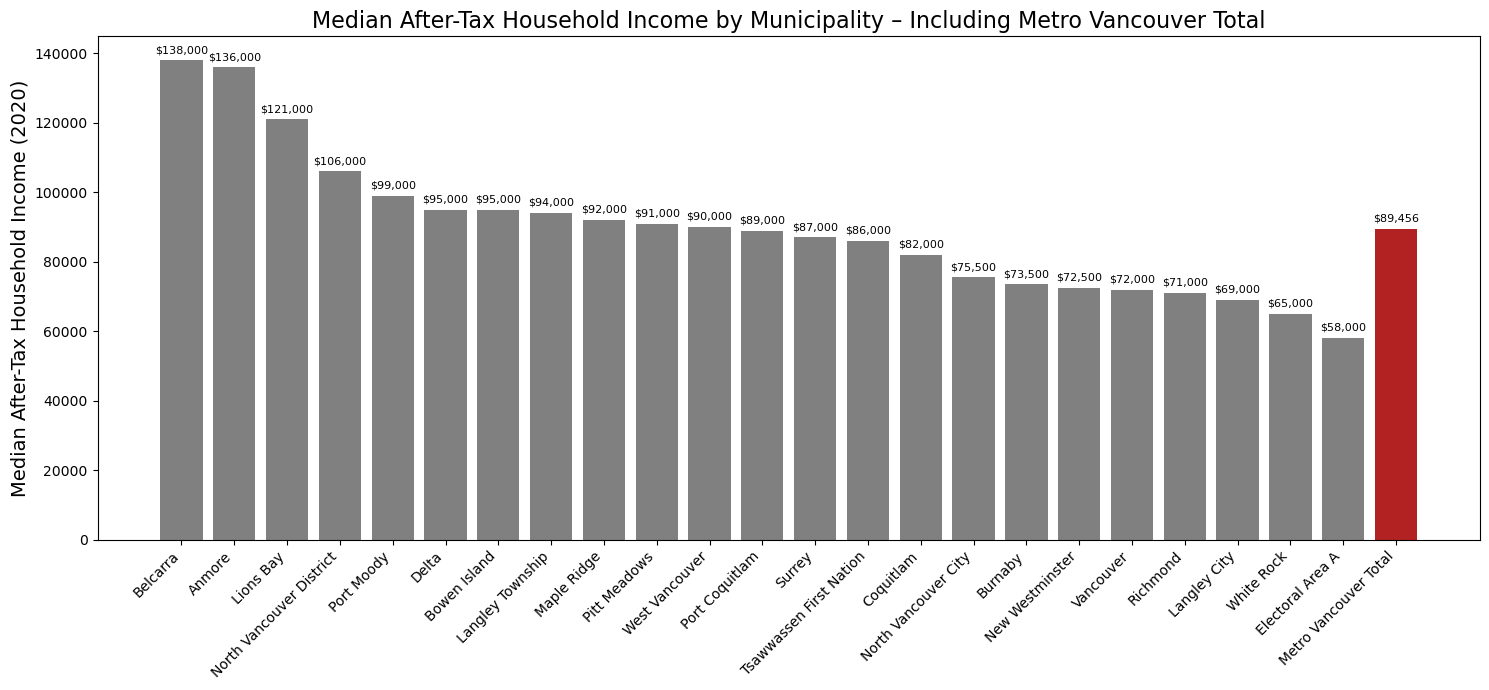

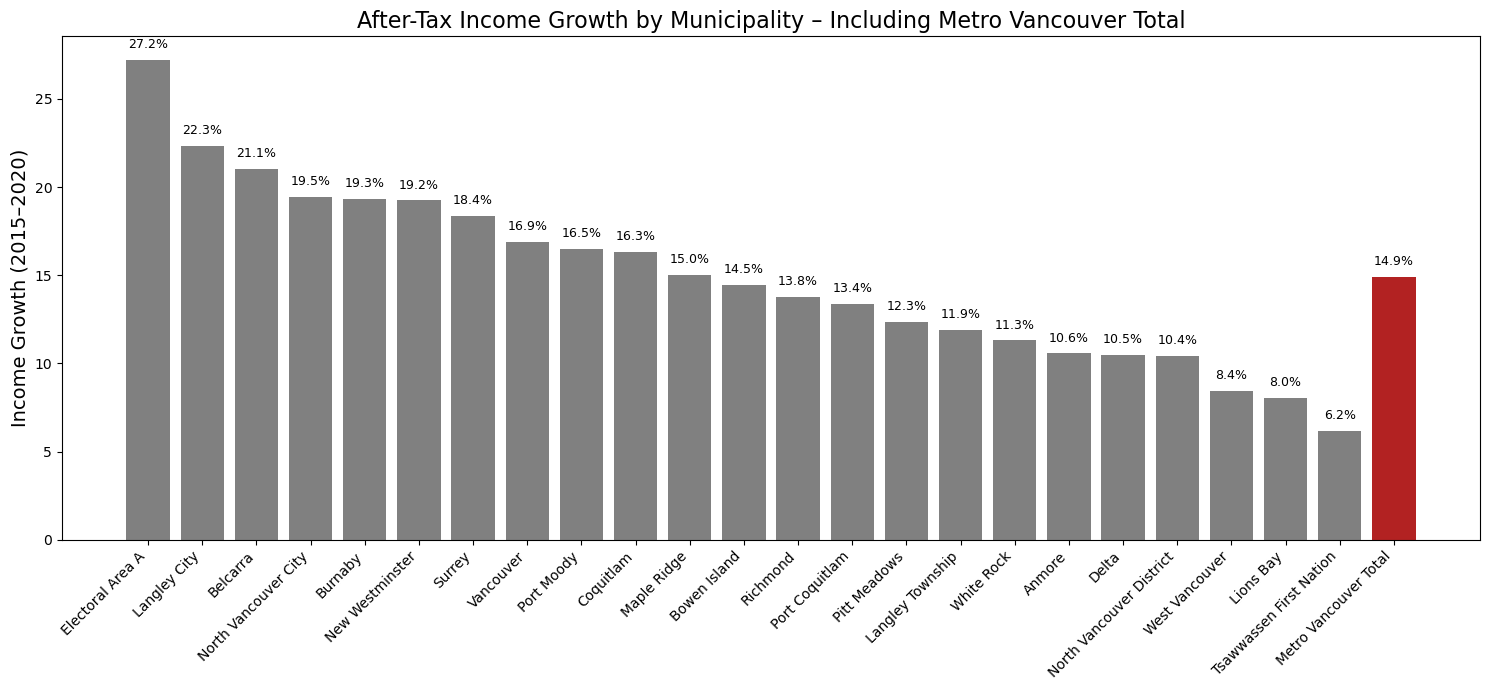

In [146]:
# ========================================
# Univariate Descriptive Analysis – After-Tax Income
# ========================================

# Step 1: Summary statistics for income-related variables
income_cols = ["income_2020_after_tax", "change_after_tax_2015_2020"]
desc = df[income_cols].describe()

# Format values with comma separator and 1 decimal
formatted_desc = desc.apply(lambda col: col.map(lambda x: f"{x:,.1f}"))
print("📊 Summary Statistics: After-Tax Income (2020) and Growth (2015–2020)")
display(formatted_desc)

# Step 2: Top 5 jurisdictions by median after-tax income in 2020
top_income = df[["jurisdiction", "income_2020_after_tax"]].sort_values(by="income_2020_after_tax", ascending=False).head(5)
top_income["income_2020_after_tax"] = top_income["income_2020_after_tax"].map(lambda x: f"${x:,.1f}")
print("💰 Top 5 Jurisdictions by Median After-Tax Income (2020)")
display(top_income)

# Step 3: Bottom 5 jurisdictions by median after-tax income in 2020
bottom_income = df[["jurisdiction", "income_2020_after_tax"]].sort_values(by="income_2020_after_tax", ascending=True).head(5)
bottom_income["income_2020_after_tax"] = bottom_income["income_2020_after_tax"].map(lambda x: f"${x:,.1f}")
print("💸 Bottom 5 Jurisdictions by Median After-Tax Income (2020)")
display(bottom_income)

# Step 4.1: Top 5 jurisdictions with the highest income growth (2015–2020)
top_growth = df[["jurisdiction", "change_after_tax_2015_2020"]].sort_values(by="change_after_tax_2015_2020", ascending=False).head(5)
top_growth["change_after_tax_2015_2020"] = top_growth["change_after_tax_2015_2020"].map(lambda x: f"{x*100:.1f}%")
print("📈 Top 5 Jurisdictions by Income Growth (2015–2020)")
display(top_growth)

# Step 4.2: Bottom 5 jurisdictions with the lowest income growth (2015–2020)
bottom_growth = df[["jurisdiction", "change_after_tax_2015_2020"]].sort_values(by="change_after_tax_2015_2020", ascending=True).head(5)
bottom_growth["change_after_tax_2015_2020"] = bottom_growth["change_after_tax_2015_2020"].map(lambda x: f"{x*100:.1f}%")
print("📉 Bottom 5 Jurisdictions by Income Growth (2015–2020)")
display(bottom_growth)

# ========================================
# Bar Chart: Median After-Tax Household Income (2020)
# ========================================

import matplotlib.pyplot as plt

# Step 1: Prepare base DataFrame
income_chart = df[['jurisdiction', 'income_2020_after_tax']].copy()

# Step 2: Calculate Metro Vancouver average (mean)
metro_income = income_chart['income_2020_after_tax'].mean()
metro_row = pd.DataFrame([{
    'jurisdiction': 'Metro Vancouver Total',
    'income_2020_after_tax': metro_income
}])

# Step 3: Append Metro Vancouver row (temporarily)
full_chart = pd.concat([income_chart, metro_row], ignore_index=True)

# Step 4: Sort all except Metro Vancouver by income
sorted_chart = full_chart[full_chart['jurisdiction'] != 'Metro Vancouver Total']
sorted_chart = sorted_chart.sort_values(by='income_2020_after_tax', ascending=False)

# Step 5: Add Metro Vancouver at the end
final_chart = pd.concat([sorted_chart, metro_row], ignore_index=True)

# Step 6: Define colors
colors = ['gray' if j != 'Metro Vancouver Total' else '#B22222' for j in final_chart['jurisdiction']]

# Step 7: Plot
plt.figure(figsize=(15, 7))
bars = plt.bar(
    final_chart['jurisdiction'],
    final_chart['income_2020_after_tax'],
    color=colors
)

# Step 8: Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1500, f"${int(height):,}",
             ha='center', va='bottom', fontsize=8)

# Step 9: Final layout
plt.xticks(rotation=45, ha="right")
plt.ylabel("Median After-Tax Household Income (2020)", fontsize=14)
plt.title("Median After-Tax Household Income by Municipality – Including Metro Vancouver Total", fontsize=16)
plt.tight_layout()

# ✅ Save the figure
plt.savefig("median_income_by_jurisdiction.png", dpi=300, bbox_inches='tight')

plt.show()

# ========================================
# Bar Chart: Growth After-Tax Household Income (2020)
# ========================================

# Step 1: Prepare base DataFrame
growth_chart = df[['jurisdiction', 'change_after_tax_2015_2020']].copy()

# Step 2: Calculate Metro Vancouver average growth
metro_growth = growth_chart['change_after_tax_2015_2020'].mean()
metro_row_growth = pd.DataFrame([{
    'jurisdiction': 'Metro Vancouver Total',
    'change_after_tax_2015_2020': metro_growth
}])

# Step 3: Combine and sort (excluding Metro Vancouver)
sorted_growth = growth_chart[growth_chart['jurisdiction'] != 'Metro Vancouver Total']
sorted_growth = sorted_growth.sort_values(by='change_after_tax_2015_2020', ascending=False)

# Step 4: Append Metro Vancouver Total to the end
final_growth_chart = pd.concat([sorted_growth, metro_row_growth], ignore_index=True)

# Step 5: Define colors
colors = ['gray' if j != 'Metro Vancouver Total' else '#B22222' for j in final_growth_chart['jurisdiction']]

# Step 6: Plot
plt.figure(figsize=(15, 7))
bars = plt.bar(
    final_growth_chart['jurisdiction'],
    final_growth_chart['change_after_tax_2015_2020'] * 100,  # convert to percentage
    color=colors
)

# Step 7: Add % labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.1f}%", 
             ha='center', va='bottom', fontsize=9)

# Step 8: Final layout
plt.xticks(rotation=45, ha="right")
plt.ylabel("Income Growth (2015–2020)", fontsize=14)
plt.title("After-Tax Income Growth by Municipality – Including Metro Vancouver Total", fontsize=16)
plt.tight_layout()

# ✅ Save the chart as image
plt.savefig("income_growth_by_jurisdiction.png", dpi=300, bbox_inches='tight')

# Show the chart
plt.show()


---
#### Insights – Income Levels (2020) and Change (2015–2020)

- **Overall regional median**

  The regional median was approximately `$89,000`, with `50% of jurisdictions earning between $73,000 and $95,000`, indicating a relatively balanced central distribution but with strong outliers at both ends.

- **Substantial income disparity across municipalities**  

  After-tax median household income in 2020 ranged from `$58,000 (Electoral Area A) to  $138,000 (Belcarra)`, revealing `a gap of $80,000` between the lowest and highest jurisdictions.

- **High-income outliers concentrated in small municipalities**

  The top incomes were found in smaller, low-density jurisdictions like **Belcarra**, **Anmore**, and **Lions Bay**, suggesting potential links to wealth concentration in exclusive residential areas.

- **Urban cores among the lowest earners**

  Surprisingly, larger and denser areas like `Vancouver ($72,000) and Richmond ($71,000)` ranked in the bottom tier, possibly due to a more diverse socioeconomic profile or housing affordability pressures.

- **Top growth in emerging or mid-range areas**

  The highest income growth between 2015 and 2020 was seen in **Electoral Area A** (+27.2%), **Langley City** (+22.3%), and **Belcarra** (+21.1%), suggesting economic momentum in these areas.

- **Wealthier areas not always leading in growth**  
  Despite high income levels, municipalities like **Lions Bay** and **West Vancouver** showed modest growth rates (8.0% and 8.4%, respectively), indicating income saturation or slower wage progression.

- **Policy implication**  
  Disparities in both income levels and growth highlight the need for tailored economic and housing strategies. Support may be needed in lower-income urban cores, while infrastructure and affordability planning remain essential in high-growth areas.


---

## 4. Key Takeaways – Univariate Descriptive Analysis

🏚️ **Housing Stock Aging is Uneven and Regionally Concentrated**
While some jurisdictions like **Lions Bay, North Vancouver District, and Delta have over 50% of their housing stock older than 40 years**, others such as **Surrey and Tsawwassen First Nation have much newer housing profiles**. This reflects differing development timelines and potential infrastructure renewal needs.

📉 **Recent Decline in Housing Construction**
Construction of new homes has declined significantly since 2010 across most jurisdictions, particularly in areas already densely developed. This may signal constraints in land availability, rising construction costs, or planning limitations.

💰 **Income Levels Vary Widely Across the Region**
Median after-tax household income in 2020 ranged from `$58,000 to $138,000`. Small, high-income jurisdictions like **Belcarra and Anmore** contrast sharply with urban centers like **Vancouver and Richmond**, which reported among the lowest median incomes.

📊 **Metro Vancouver Provides a Key Regional Baseline**
With approximately **36% of owner-occupied homes built before 1980** and a **median after-tax household income of $82,000**, Metro Vancouver serves as a critical benchmark for assessing relative risk and opportunity. Jurisdictions significantly above or below this baseline may warrant differentiated planning and policy responses.

📈 **Not All High-Income Areas Show Strong Growth**
While some emerging municipalities experienced strong income growth (e.g., Langley City, Electoral Area A), many high-income areas had relatively modest increases between 2015 and 2020, possibly indicating wage stagnation at the top.

🗺️ **Disparities Call for Differentiated Policy Approaches**
The data reveals both spatial and socioeconomic disparities across Metro Vancouver. These findings can inform targeted strategies for urban renewal, housing affordability, income support, and sustainable growth planning.


---

## 5. Summary

In this second notebook, we conducted a **univariate descriptive analysis** to explore housing and income characteristics across Metro Vancouver jurisdictions. The main steps included:

- Loading the cleaned and merged dataset prepared in Notebook 1
- Calculating the share of housing units built before 1980 as an indicator of stock aging
- Visualizing total and decade-based housing construction trends by jurisdiction
- Analyzing median after-tax household income in 2020 across municipalities
- Examining income growth between 2015 and 2020 to identify economic shifts
- Highlighting disparities and patterns in both housing age and income distributions

The insights generated here reveal spatial and socioeconomic contrasts that will guide further exploration.  
This analysis sets the foundation for **multivariate techniques** in Notebook 3, where we will investigate deeper relationships between variables and group similar jurisdictions.